In [1]:
import pandas as pd
import os
%matplotlib inline
os.chdir = ('/Users/zhouyu/Google Drive/python4work/')

In [2]:
dataset = pd.read_csv("infoexc_spikes06-Dec-2016.csv")

In [3]:
dataset['Loc_x'] = dataset.apply(lambda row:int(row['splitOnPatchLocation'].split('  ')[0]),axis = 1)
dataset['Loc_y'] = dataset.apply(lambda row:int(row['splitOnPatchLocation'].split('  ')[1]),axis = 1)
dataset['cell_id'] = dataset['splitOnExperimentDate']+dataset['celllabel']
dataset = dataset.drop(['splitOnPatchLocation','splitOnDelTag','nodeid','leafid','splitOnExperimentDate','celllabel'],axis = 1)
dataset.head(3)

,id,splitOnRecType,stimulusTag,imageName,imagePatchIndex,MeanRespOn,SEM,Loc_x,Loc_y,cell_id
0,1,exc,image,152,1,-822.143387,43.759201,1241,648,2016/08/10Cell 1- on parasol
1,2,exc,intensity,152,1,-673.196247,106.060358,1241,648,2016/08/10Cell 1- on parasol
2,3,exc,image,152,2,-57.449961,20.437119,679,707,2016/08/10Cell 1- on parasol


In [24]:
#save files
dataset.to_csv('info_excVSspikes06-Dec-2016.csv')

In [4]:
import numpy as np
dataset = dataset[dataset['imageName']==152];
grouped = dataset.groupby(['cell_id','splitOnRecType','stimulusTag'])
avgNLI = grouped['MeanRespOn'].aggregate(np.mean)

avgNLIset = avgNLI.reset_index()

avgNLIset.head(3)

,cell_id,splitOnRecType,stimulusTag,MeanRespOn
0,2016/08/10Cell 1- on parasol,exc,image,-212.609868
1,2016/08/10Cell 1- on parasol,exc,intensity,-191.616690
2,2016/08/10Cell 2 - on parasol,cell-attach,image,4.148718


In [5]:
avgNLIset_split = avgNLIset[avgNLIset['stimulusTag'] == 'image']
avgNLIset_split.rename(columns = {'MeanRespOn':'imgResp'},inplace = True);
avgNLIset_s2 = avgNLIset[avgNLIset['stimulusTag'] =='intensity']
avgNLIset_s2.rename(columns = {'MeanRespOn':'discResp'},inplace = True);
avgNLIset_split = pd.merge(avgNLIset_split,avgNLIset_s2, on = ['cell_id','splitOnRecType'])

/Users/zhouyu/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [6]:
def cal_NLI(x,y):
    return (x-y)/(abs(x)+abs(y))
#avgNLIset_split[avgNLIset_split['splitOnRecType']=='exc'][['imgResp','discResp']].map(lambda x:-x)
avgNLIset_split['NLI'] = avgNLIset_split.apply(lambda row:cal_NLI(row['imgResp'],row['discResp']),axis =1)

avgNLIset_split['cNLI'] = avgNLIset_split.apply(lambda row:-row['NLI'] if row['splitOnRecType']=='exc' else row['NLI'],axis =1)

avgNLIset_split

,cell_id,splitOnRecType,stimulusTag_x,imgResp,stimulusTag_y,discResp,NLI,cNLI
0,2016/08/10Cell 1- on parasol,exc,image,-212.609868,intensity,-191.616690,-0.051934,0.051934
1,2016/08/10Cell 2 - on parasol,cell-attach,image,4.148718,intensity,3.418613,0.096481,0.096481
2,2016/08/10Cell 2 - on parasol,exc,image,-173.764046,intensity,-162.598387,-0.033195,0.033195
3,2016/09/13On parasol1,cell-attach,image,2.462406,intensity,2.633854,-0.033642,-0.033642
4,2016/09/13On parasol1,exc,image,-48.956592,intensity,-38.684089,-0.117212,0.117212
5,2016/09/13On parasol2,cell-attach,image,1.502906,intensity,1.020218,0.191306,0.191306
6,2016/09/13On parasol2,exc,image,-81.142323,intensity,-60.917167,-0.142371,0.142371
7,2016/09/13On parasol3,cell-attach,image,2.395738,intensity,1.588673,0.202556,0.202556
8,2016/09/13On parasol3,exc,image,-99.152565,intensity,-78.960307,-0.113368,0.113368
9,2016/10/11Cell1,exc,image,-127.096210,intensity,-101.334744,-0.112776,0.112776


In [7]:
# only get rows where exc and cell-attach are both present
rows = [];
for i in range(1,len(avgNLIset_split)):
    if avgNLIset_split.iloc[i]['cell_id']==avgNLIset_split.iloc[i-1]['cell_id']:
        rows.append(i-1)
        rows.append(i)

sub_data = avgNLIset_split.iloc[rows]

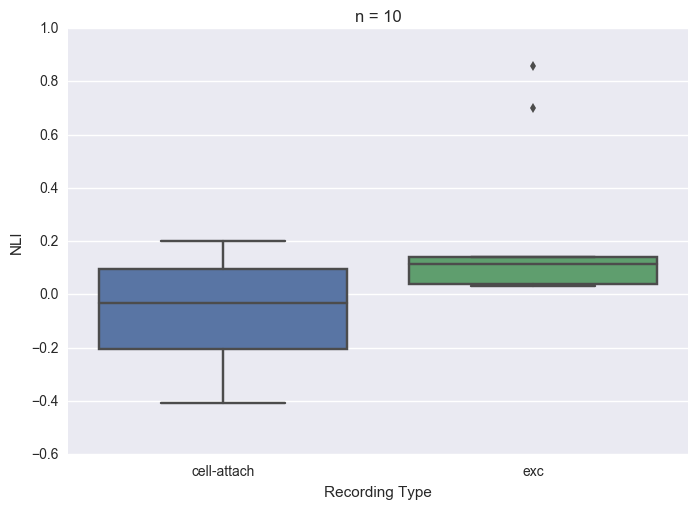

In [8]:
import seaborn as sns
g = sns.boxplot(x = "splitOnRecType",y = "cNLI",data =sub_data)
g.set(xlabel='Recording Type',ylabel = 'NLI',title = 'n = 10')

#sub_data.to_csv('NLI_excVSspikes.csv')

In [11]:
sub_exc = sub_data[sub_data['splitOnRecType']=='exc']
sub_exc.to_csv('exc_00152_groupNLI.csv')

In [9]:
#dataset['imgPatch'] = dataset.apply(lambda row:str(row['imageName'])+'-'+str(row['imagePatchIndex']),axis=1)
spike = dataset[dataset['splitOnRecType']=='cell-attach']
exc = dataset[dataset['splitOnRecType']=='exc']
spike.rename(columns = {'MeanRespOn':'SpikeResp'},inplace = True)
exc.rename(columns = {'MeanRespOn':'ExcResp'},inplace = True)
exc.head(3)
#exc = exc.drop(['imageName','imagePatchIndex','SEM'],axis = 1)
#spike = spike.drop(['imageName','imagePatchIndex','SEM'],axis = 1)

,id,splitOnRecType,stimulusTag,imageName,imagePatchIndex,ExcResp,SEM,Loc_x,Loc_y,cell_id
0,1,exc,image,152,1,-822.143387,43.759201,1241,648,2016/08/10Cell 1- on parasol
1,2,exc,intensity,152,1,-673.196247,106.060358,1241,648,2016/08/10Cell 1- on parasol
2,3,exc,image,152,2,-57.449961,20.437119,679,707,2016/08/10Cell 1- on parasol


In [10]:
exc = pd.merge(exc[exc['stimulusTag']=='image'],exc[exc['stimulusTag']=='intensity'],on = ['splitOnRecType','cell_id','imageName','Loc_x','Loc_y'])
exc['NLI'] = exc.apply(lambda row:-cal_NLI(row['ExcResp_x'],row['ExcResp_y']),axis =1)
exc = exc.drop(['stimulusTag_x','ExcResp_x','stimulusTag_y','ExcResp_y','imagePatchIndex_x','SEM_x','SEM_y'],axis = 1)
exc.head(3)

,id_x,splitOnRecType,imageName,Loc_x,Loc_y,cell_id,id_y,imagePatchIndex_y,NLI
0,1,exc,152,1241,648,2016/08/10Cell 1- on parasol,2,1,0.099608
1,3,exc,152,679,707,2016/08/10Cell 1- on parasol,4,2,1.000000
2,5,exc,152,1287,606,2016/08/10Cell 1- on parasol,6,3,0.024524


In [11]:
spike = pd.merge(spike[spike['stimulusTag']=='image'],spike[spike['stimulusTag']=='intensity'],on = ['splitOnRecType','cell_id','imageName','Loc_x','Loc_y'])
spike['NLI'] = spike.apply(lambda row:cal_NLI(row['SpikeResp_x'],row['SpikeResp_y']) if row['SpikeResp_x']!=0 and row['SpikeResp_y']!=0 else 0,axis =1)
spike = spike.drop(['stimulusTag_x','SpikeResp_x','stimulusTag_y','SpikeResp_y','imagePatchIndex_x','SEM_x','SEM_y'],axis = 1)
spike.head(3)

,id_x,splitOnRecType,imageName,Loc_x,Loc_y,cell_id,id_y,imagePatchIndex_y,NLI
0,1,cell-attach,152,1241,648,2016/08/10Cell 2 - on parasol,3,1,-0.062671
1,5,cell-attach,152,679,707,2016/08/10Cell 2 - on parasol,7,2,1.000000
2,9,cell-attach,152,1287,606,2016/08/10Cell 2 - on parasol,11,3,-0.063857


In [13]:
result = pd.merge(spike,exc,how = 'inner',on = ['cell_id','imageName','Loc_x','Loc_y'])
result.head(3)

,id_x_x,splitOnRecType_x,imageName,Loc_x,Loc_y,cell_id,id_y_x,imagePatchIndex_y_x,NLI_x,id_x_y,splitOnRecType_y,id_y_y,imagePatchIndex_y_y,NLI_y
0,1,cell-attach,152,1241,648,2016/08/10Cell 2 - on parasol,3,1,-0.062671,2,exc,4,1,0.007275
1,5,cell-attach,152,679,707,2016/08/10Cell 2 - on parasol,7,2,1.000000,6,exc,8,2,0.561831
2,9,cell-attach,152,1287,606,2016/08/10Cell 2 - on parasol,11,3,-0.063857,10,exc,12,3,0.133853


In [22]:
#result['patchId'] = result.apply(lambda row:str(row['imageName'])+'-'+str(row['Loc_x'])+'-'+str(row['Loc_y']),axis = 1)
#result1 = result[['splitOnRecType_x','cell_id','patchId','NLI_x']]
#result2 = result[['splitOnRecType_y','cell_id','patchId','NLI_y']]
#result1.rename(columns ={'splitOnRecType_x':'RecType','NLI_x':'NLI'},inplace = True)
#result2.rename(columns ={'splitOnRecType_y':'RecType','NLI_y':'NLI'},inplace = True)
#frames = [result1,result2]
#result_img = pd.concat(frames)
result_img = result[['imageName','Loc_x','Loc_y','cell_id','patchId','NLI_x','NLI_y']]
result_img.rename(columns = {'NLI_x':'spike_NLI','NLI_y':'exc_NLI'},inplace = True)
result_img.to_csv("patch_NLI_excVSspikes.csv")

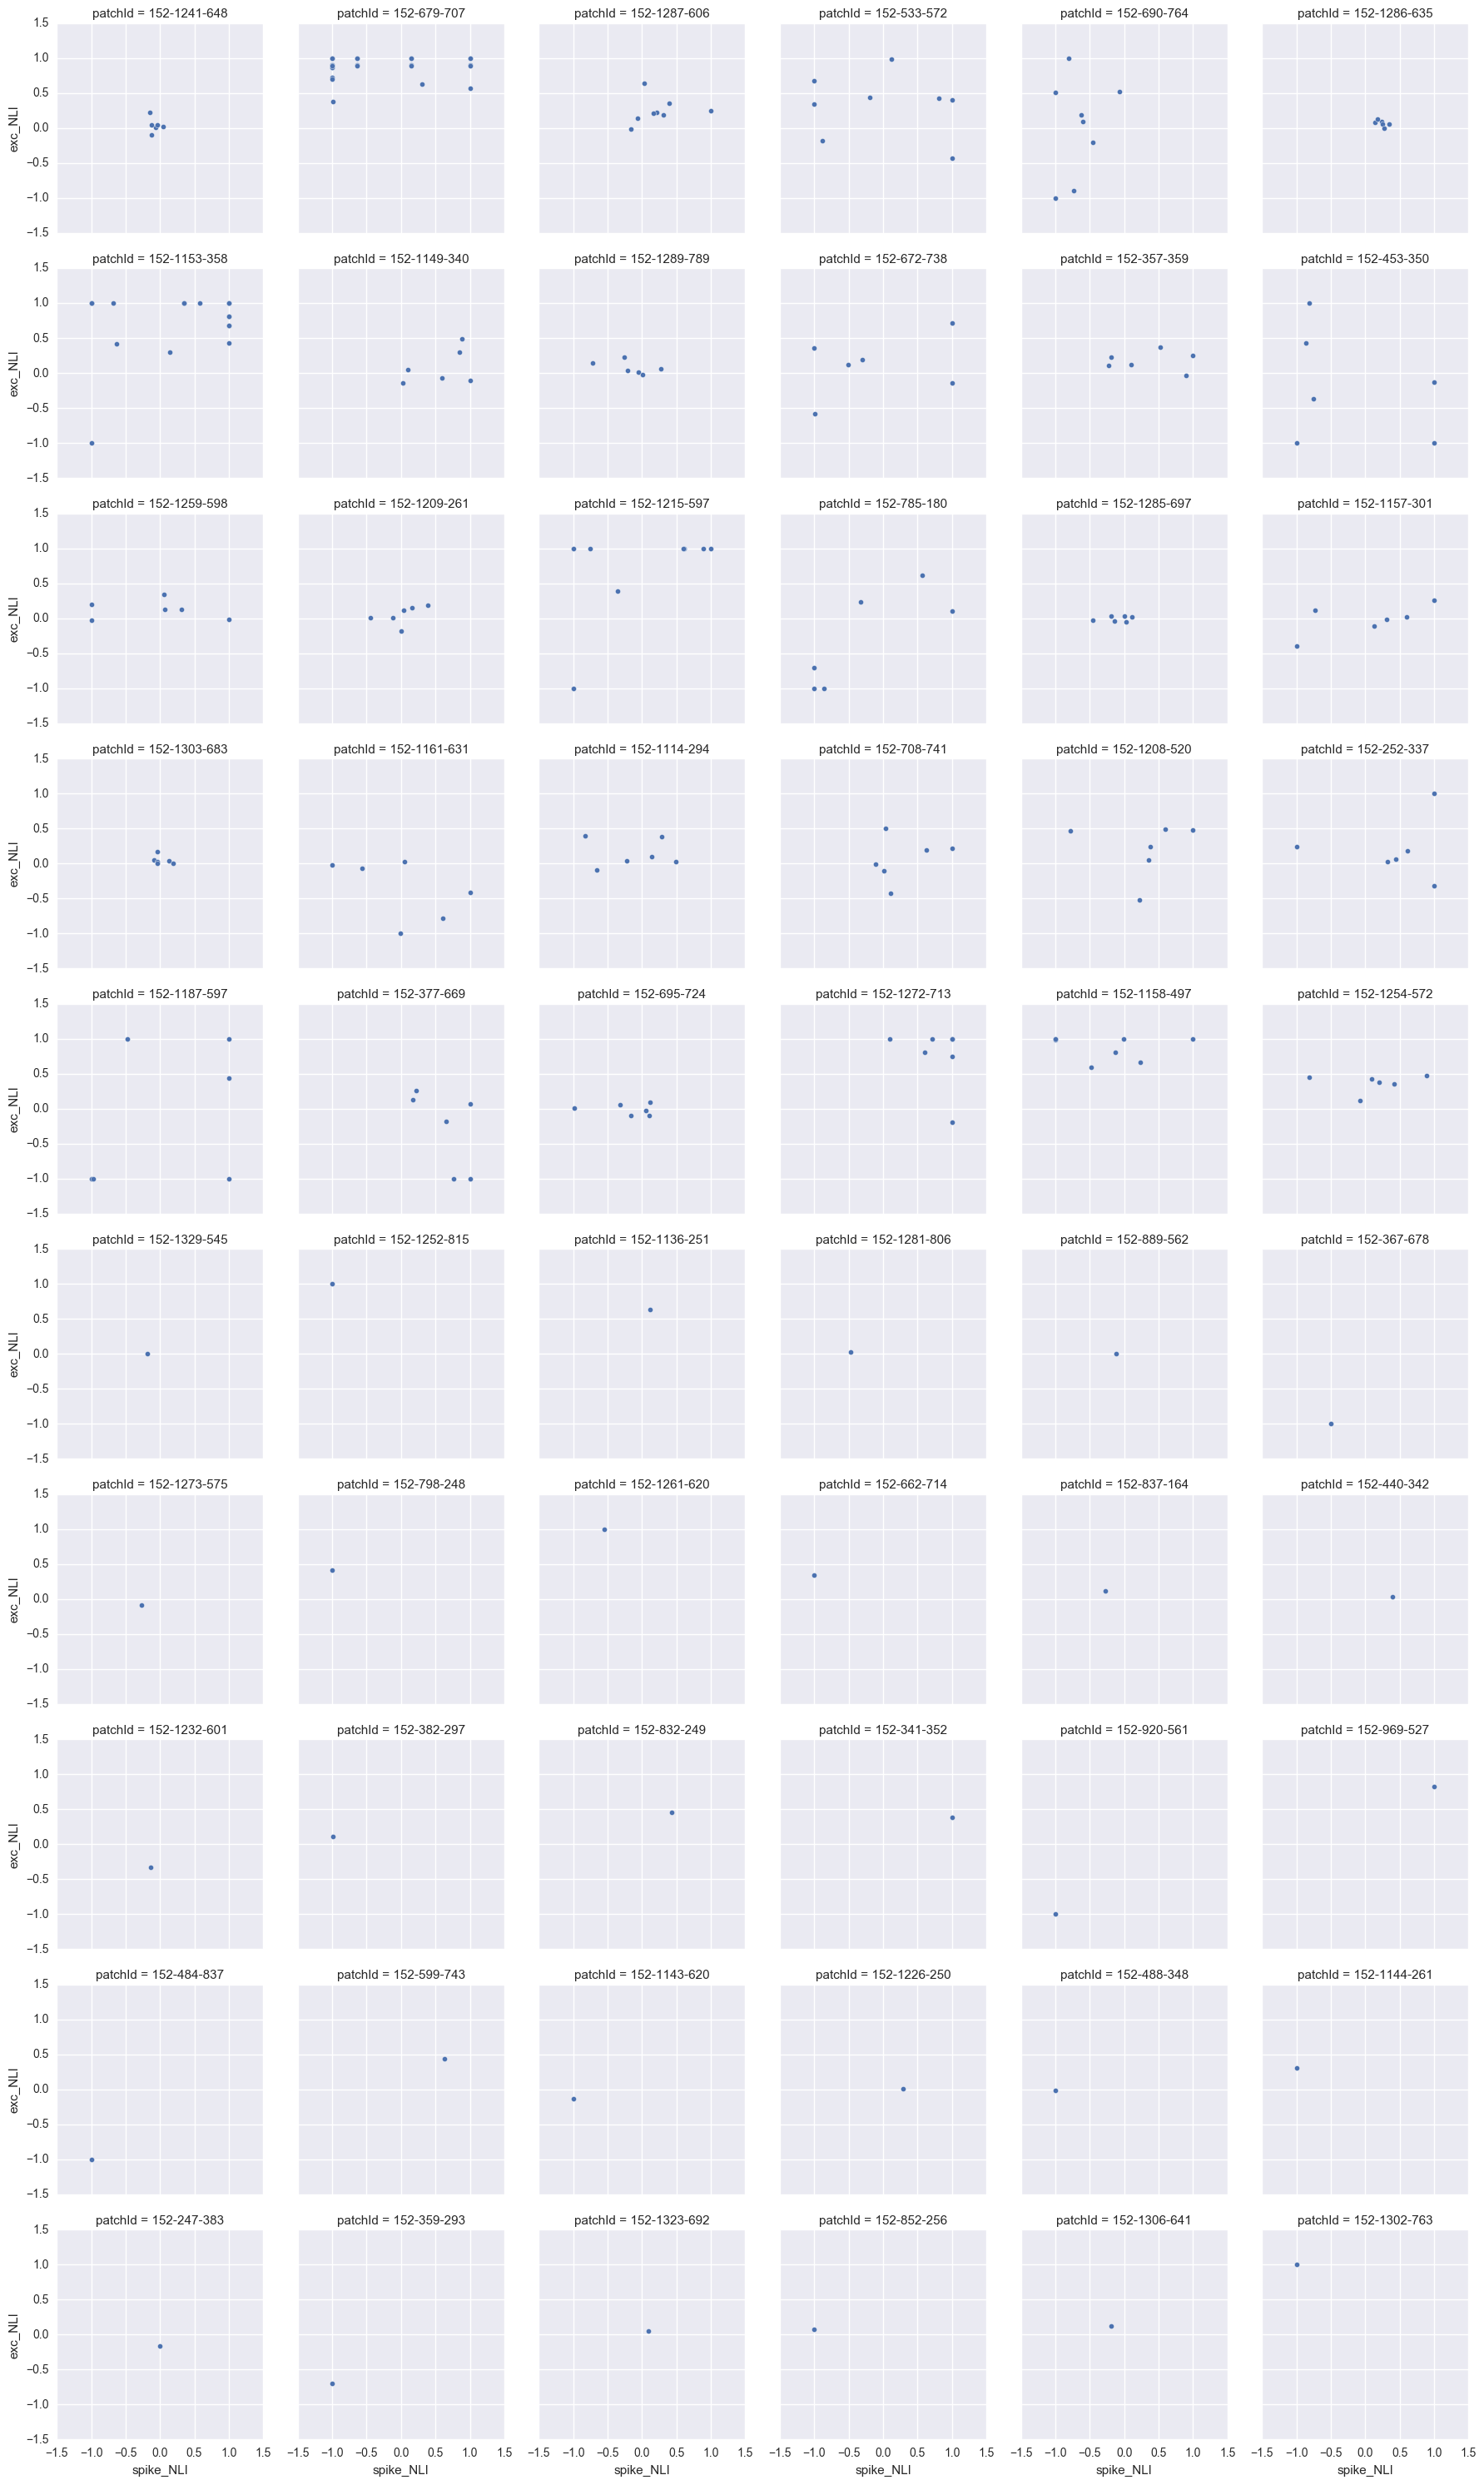

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(result_img, col="patchId", col_wrap = 6)
g = g.map(plt.scatter,"spike_NLI","exc_NLI",edgecolor = "w")